In [1]:
# standard imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### 1. Getting data ready to be used in the machine learning model 

   
Generallly we need to perform three main things :

  1. Split the data into features and labels ( usually **'X'** and **'y'** )
  2. Filling ( also called imputing ) or disregarding missing values
  3. Converting non- numerical values to numerical values ( also called feature encoding )

In [2]:
heat_diesease = pd.read_csv("heart-disease.csv")
heat_diesease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Feature selection 

X = heat_diesease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
# label selection 

y = heat_diesease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
# split the data into training  and test sets

from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test   = train_test_split(X,y,test_size=0.2)





In [6]:
X_train.shape , X_test.shape , y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [7]:
X_train.shape[0]+ X_test.shape[0] , X.shape[0]

(303, 303)

## 1.1 Make sure it's all numerical 

In [8]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [9]:
len(car_sales)

1000

In [10]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [11]:
type(car_sales["Make"][0])

str

In [12]:
# split the data into X and y features and labels selection 

X = car_sales.drop("Price",axis=1)

y = car_sales["Price"]

X.head(),y.head()



(     Make Colour  Odometer (KM)  Doors
 0   Honda  White          35431      4
 1     BMW   Blue         192714      5
 2   Honda  White          84714      4
 3  Toyota  White         154365      4
 4  Nissan   Blue         181577      3,
 0    15323
 1    19943
 2    28343
 3    13434
 4    14043
 Name: Price, dtype: int64)

In [13]:
car_sales["Doors"].unique(), car_sales["Doors"].value_counts(),car_sales["Doors"].mode()

(array([4, 5, 3], dtype=int64),
 4    856
 5     79
 3     65
 Name: Doors, dtype: int64,
 0    4
 dtype: int64)

In [14]:
# split the data into training and test 

X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2)

In [15]:
# Build a machine learning model


from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train,y_train)

model.score(X_test,y_test)

ValueError: could not convert string to float: 'Honda'

this error occurs because the dataframe contains objects or string or non numerical values  . Let's transform  them into **numerical** values

In [16]:
# Turn categories into numerical values

from sklearn.preprocessing import OneHotEncoder 

from sklearn.compose import ColumnTransformer


categorical_features = ["Make","Colour","Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")


tranformed_X = transformer.fit_transform(X)

pd.DataFrame(tranformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [ ]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

In [ ]:
# lets refit the model

np.random.seed(42)

X_train ,X_test,y_train,y_test  = train_test_split(tranformed_X,y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

lin_model.fit(X_train,y_train)

lin_model.score(X_test,y_test)

## 1.1 What if there is missing values in data :
 1. Fill them with some values (also known as imputation ) . 

 2. Remove the samples with missing values altogether
    

# dealing with missing values with Pandas

In [ ]:
# import dataset with missing values 

car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

car_sales_missing.head()

In [ ]:
# let's see how many missing values are there 


car_sales_missing.isna().sum()

In [ ]:
# drop the data without labels (y)
car_sales_missing.dropna(subset=["Price"],inplace=True)

In [ ]:
len(car_sales_missing)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# splitting dataset into X and y

X = car_sales_missing.drop("Price",axis=1)

y = car_sales_missing["Price"]

# splitting data into training and test set 

np.random.seed(1)

from sklearn.model_selection import train_test_split

X_train , X_test ,y_train , y_test  = train_test_split(X,y,test_size=0.2)


In [ ]:
X.isna().sum(), y.isna().sum()  , X_train.isna().sum() , X_test.isna().sum()

In [ ]:
X_train["Doors"].value_counts(), X_train["Doors"].mode()

In [ ]:
# Filling the missing values using pandas


# fill the Categorical featrures with missing and numerical features with mean 

# color

X_train["Colour"].fillna("Missing",inplace=True)
X_test["Colour"].fillna("Missing",inplace=True)

# make

X_train["Make"].fillna("Missing",inplace=True)
X_test["Make"].fillna("Missing",inplace=True)

# Odometer

X_train["Odometer (KM)"].fillna(X_train["Odometer (KM)"].mean(),inplace=True)
X_test["Odometer (KM)"].fillna(X_test["Odometer (KM)"].mean(),inplace=True)

# doors

X_train["Doors"].fillna(4,inplace=True)
X_test["Doors"].fillna(4,inplace=True)





In [ ]:
# transform the categorical features into numerical features

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features =["Make","Colour","Doors"]

one_hot = OneHotEncoder()

transfomer = ColumnTransformer([
    ("one_hot", one_hot,categorical_features)
],
remainder="passthrough")


transformed_X_train = transformer.fit_transform(X_train)
transfromed_X_test = transformer.transform(X_test)

transformed_X_train.toarray()


In [ ]:
# fit the model and check the accuracy 

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(transformed_X_train,y_train)

model.score(transfromed_X_test,y_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

lin_model.fit(transformed_X_train,y_train)
lin_model.score(transfromed_X_test,y_test)

## Option 2 :Fill missing values with Scikit-Learn

In [ ]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
# see how many missing values it contains 

car_sales_missing.isna().sum() , len(car_sales_missing)

In [ ]:
# drop rows without labels ( y or Price value)

car_sales_missing.dropna(subset=["Price"],inplace=True)

car_sales_missing.isna().sum(), len(car_sales_missing)

In [ ]:
car_sales_missing.head()

In [ ]:
# split the dataset 

# split into X and y

X = car_sales_missing.drop("Price",axis=1)

y= car_sales_missing["Price"]



# splitting into the train and test sets

np.random.seed(77)

from sklearn.model_selection import train_test_split


X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X.isna().sum()

In [ ]:
X_test

In [ ]:
# Filling missing values with Scikit-Learn

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer


# fill categorical features with missing and numerical values with mean 

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
doors_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define colmns

cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]


imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("doors_imputer",doors_imputer,door_feature),
    ("num_imputer",num_imputer,num_features)
])

filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)



pd.DataFrame(filled_X_train).info

In [ ]:
type(transformer) , transformer , imputer , type(filled_X_test)

In [ ]:
filled_X_train.shape,filled_X_test.shape

In [ ]:
# creating dataframe with filled values 

car_sales_filled_X_train = pd.DataFrame(filled_X_train,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled_X_test = pd.DataFrame(filled_X_test,columns=["Make","Colour","Doors","Odometer (KM)"])



In [ ]:
car_sales_filled_X_train.isna().sum()

In [ ]:
car_sales_filled_X_test.isna().sum()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
car_sales_filled_X_train.head()

In [ ]:
# now transform the categorical features into numerical features 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ["Make","Colour","Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([
    ("one_hot",one_hot,categorical_features)
],
remainder="passthrough")

transformed_X_train= transformer.fit_transform(car_sales_filled_X_train)
transformed_X_test= transformer.transform(car_sales_filled_X_test)

transformed_X_train.toarray()

In [ ]:
# fit the model

from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()

model.fit(transformed_X_train,y_train)
model.score(transformed_X_test,y_test)


## 2. Choosing the right estimatoor / algorithm for our problem 

Scikit-Learn uses estimator as another term for machine learning model or algorithm . 


   * Classification => predicting whether a sample is one thing or another 
   * Reression => predicting a number 
   * Clustering => identifying simillar group of data
   * Dimensionality reduction 
  
  
 
we can take the help of  [this](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) scikit-learn map to chosse what model to use 

### 2.1 Picking a machine laerning model for a regression problem 

In [43]:
# Import boston housing dataset . 

from sklearn.datasets import load_boston
boston = load_boston()

boston["feature_names"] , boston.keys()

(array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'),
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename']))

In [ ]:
boston

In [44]:
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])

In [ ]:
len(boston_df.columns) , len (boston_df)

In [45]:
boston_df["target"] = pd.Series(boston["target"])

In [46]:
len(boston_df.columns) , len (boston_df)

(14, 506)

In [47]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
len(boston_df.columns)

In [48]:
# split the data into X and y 

np.random.seed(77)
X = boston_df.drop("target",axis = 1)

y = boston_df["target"]

# split the data into tarining and test sets 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

# now let's try Ridge Reression

from sklearn.linear_model import Ridge

ridge_model = Ridge()

ridge_model.fit(X_train,y_train)

ridge_model.score(X_test,y_test)


0.7306005477249629

How do we improve this score ? 
What if Ridge wasn't working ?%%!
Let's refer back to the  [map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [49]:
# lets try random forest regressor 

from sklearn.ensemble import RandomForestRegressor

np.random.seed(77)

X = boston_df.drop("target", axis= 1)

y = boston_df["target"]


from sklearn.model_selection import train_test_split


X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

rf_model = RandomForestRegressor()


rf_model.fit(X_train,y_train)

rf_model.score(X_test,y_test)

0.9009453327079903

In [61]:
y_pred_price = rf_model.predict(X_test)
y_pred_price


array([22.577, 15.579, 23.73 , 30.598, 21.972, 17.977, 34.839, 21.753,
        8.628, 18.519, 14.708, 22.975, 21.505, 18.432, 22.055, 25.067,
       20.86 , 26.633, 21.54 , 28.575, 31.494, 21.104, 18.656, 13.747,
       10.164, 32.396, 33.833, 14.92 , 16.33 , 26.223, 20.515, 30.507,
       28.508, 14.803, 25.947, 20.893, 20.739, 10.717, 20.495, 23.448,
       19.766, 26.26 , 26.815, 42.951, 22.874, 33.422, 18.83 , 14.577,
       19.287, 21.763, 24.032, 20.645, 20.045, 20.09 , 23.318, 13.915,
       19.87 ,  7.982, 24.027, 18.886, 26.264, 14.545, 30.866, 45.951,
       25.824, 19.451, 19.278, 17.197, 14.634, 10.174, 45.984, 20.662,
       21.718, 24.892, 31.387, 19.65 , 26.945, 20.634, 26.513, 25.314,
       34.763, 28.192, 22.764, 16.008, 11.974, 19.397, 10.149, 13.807,
       14.07 , 20.291,  8.919, 18.963, 48.622, 14.082, 16.913, 23.434,
       48.047, 16.424, 18.222, 23.601, 12.394, 13.53 ])

In [55]:
y_test[:5]

313    21.6
139    17.8
314    23.8
89     28.7
87     22.2
Name: target, dtype: float64

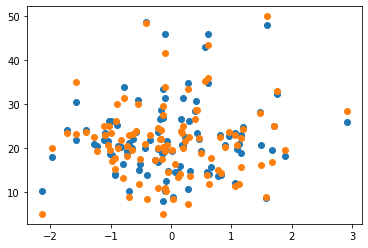

In [62]:
np.random.seed(77)

x = np.random.randn(len(y_test))

fig , ax = plt.subplots()
#len(y_pred_price),len(x)
ax.scatter(x,y_pred_price)
ax.scatter(x,y_test)

## what to do when we might deal with Classification problem .

follow the [map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

### Choosing right model for classification problem

In [18]:
# impotring dataset 

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


now lets follow the [map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [ ]:
len(heart_disease)

the map is suggesting to use LinearSVC . Let's try that out ! 

In [ ]:
# split the dataframe into X (features) and y (target) 

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]


# import random seed 

np.random.seed(77)

# split the X and y into train and test set 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size =0.2)


# import LinearSVC

from sklearn.svm import LinearSVC

# instanciate the LinearSVC
svc_model = LinearSVC(max_iter=10000)

# fit the model 
svc_model.fit(X_train,y_train)

# evaluate the model 

svc_model.score(X_test,y_test)

Suppose it is not working , then , following the [map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) we came across to use the ensemble classifiers, And , one of it is well known to us . RandomForestClassifier . Let's use that 

In [ ]:
# split the dataframe into X (features) and y (target) 

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]


# import random seed 

np.random.seed(77)

# split the X and y into train and test set 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size =0.2)


# import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

# instanciate the RandomForestClassifier

rfc_model = RandomForestClassifier()

# fit the model 
rfc_model.fit(X_train,y_train)

# evaluate the model 

rfc_model.score(X_test,y_test)



## 3 . Fit the model/algorithm / estimator on out data and use it to make prediction 

### 3.1 Fitthing the model to the data 


In [19]:
# split the dataframe into X (features) and y (target) 

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]


# setup  random seed 

np.random.seed(77)

# split the X and y into train and test set 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size =0.2)


# import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

# instanciate the RandomForestClassifier

rfc_model = RandomForestClassifier()

# fit the model ( or training the machine learning model )
rfc_model.fit(X_train,y_train)

# evaluate the model 

rfc_model.score(X_test,y_test)

0.8524590163934426

### 3.2 Make predictions using a machine learning model 



In [20]:
# pridicting y values 

y_pred = rfc_model.predict(X_test)

In [21]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [22]:
np.array(y_test)


array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [23]:
# compare predictions to truth level to evalute the model 

y_preds = rfc_model.predict(X_test)


np.mean(y_preds == y_test)

0.8524590163934426

In [36]:
(y_preds == y_test).value_counts()

True     52
False     9
Name: target, dtype: int64

In [31]:
right_prediction = (y_preds == y_test).value_counts()[1]

In [32]:
right_prediction

52

In [34]:
total_predictions = len(y_preds)

score = right_prediction/total_predictions 
score

0.8524590163934426

In [24]:
rfc_model.score(X_test,y_test)

0.8524590163934426

In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_preds)

0.8524590163934426

### predicting with _predict_proba()_

In [39]:
rfc_model.predict_proba(X_test[:5])

array([[0.18, 0.82],
       [0.3 , 0.7 ],
       [0.01, 0.99],
       [0.2 , 0.8 ],
       [0.99, 0.01]])

In [40]:
rfc_model.predict(X_test[:5])

array([1, 1, 1, 1, 0], dtype=int64)

In [41]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3


## predicting for the regression problem 

In [4]:
from sklearn.datasets import load_boston
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston_df = pd.DataFrame(boston["data"] , columns = boston["feature_names"])

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston_df["target"] = boston["target"]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split


# splitting the data into X and y 


np.random.seed(44)

X = boston_df.drop("target", axis=1)

y = boston_df["target"]



X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2)

rfr_model = RandomForestRegressor()

rfr_model.fit(X_train, y_train)

y_preds = rfr_model.predict(X_test)

In [19]:
y_preds[:10]

array([18.19 , 18.773, 21.812, 30.921, 15.731, 32.763, 20.648, 21.462,
       24.157, 22.644])

In [21]:
np.array(y_test[:10])

array([17.8, 21.5, 21.2, 32.4, 10.9, 31.7, 21.4, 24.3, 29.1, 25. ])

In [22]:
# compare predictions to the truth value

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

2.274029411764706

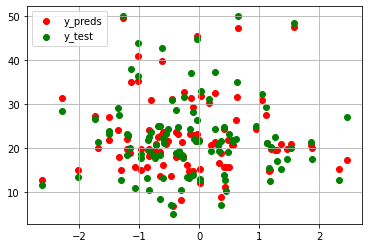

In [32]:
x = np.random.randn(len(y_test))

fig , ax = plt.subplots()

ax.scatter(x,y_preds , c="r", label="y_preds")
ax.scatter(x,y_test , c="g" , label = "y_test");
ax.legend()
ax.grid(True);

## 4. Evaluating a machine learning model 
Three ways to evaluagte Scikit-learn models/estimators 

 1. Eastimator `score` method
 2. The `scoring` parameter
 3. Problem-specific metric functions.
 
 

### 4.1 Eastimator `score` method: 


In [2]:
heart_disease = pd.read_csv("heart-disease.csv")

In [35]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis= 1)

y= heart_disease["target"]


X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2)


rfc_model = RandomForestClassifier()

rfc_model.fit(X_train , y_train)

RandomForestClassifier()

In [43]:
rfc_model.score(X_test,y_test) , rfc_model.score(X_train,y_train)

(0.8032786885245902, 1.0)

now let's do this for the regression preoblem 

In [7]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split


# splitting the data into X and y 


np.random.seed(44)

X = boston_df.drop("target", axis=1)

y = boston_df["target"]



X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2)

rfr_model = RandomForestRegressor()

rfr_model.fit(X_train, y_train)



RandomForestRegressor()

In [50]:
rfr_model.score(X_test, y_test) , rfr_model.score(X_train, y_train)

(0.891728854028301, 0.9810142970624807)

### 4.2 Evaluating a model using the `scoring` parameter

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis= 1)

y= heart_disease["target"]


X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2)


rfc_model = RandomForestClassifier()

rfc_model.fit(X_train , y_train)

cross_val_score = cross_val_score(rfc_model,X,y, cv=5)

cross_val_score

array([0.83606557, 0.86885246, 0.75409836, 0.83333333, 0.75      ])

In [53]:
single_score = rfc_model.score(X_test, y_test)

0.51

In [13]:
from sklearn.metrics import classification_report

print(classification_report(np.array([0,1,0,1,1,0]),np.array([1,0,1,1,1,0])))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



In [56]:
print(f"The single score of the estimator : {single_score} and mean of 5 fold cross validation score : {np.mean(cross_val_score)}")

The single score of the estimator : 0.8360655737704918 and mean of 5 fold cross validation score : 0.8282513661202187


### 4.2.1 .Classification model evaluation metrics 
    1. Accuracy
    2. Area under ROC curve 
    3. Confusion matrix 
    4. Classification report 

**Accuracy**

In [6]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


np.random.seed(44)

X = heart_disease.drop("target", axis= 1)
y = heart_disease["target"]

rfc_model = RandomForestClassifier()

cross_validated_score = cross_val_score(rfc_model,X,y,cv=5)


In [9]:
print(f" Heart Disease Classifier Cross - Validated (5 folds) Accuracy : {np.mean(cross_validated_score)*100:.2f}%")

 Heart Disease Classifier Cross - Validated (5 folds) Accuracy : 81.83%


**Area under the receiver operating chareacterstic curve (AUC/ROC)**
   * Area under the curve (AUC)
   * Receiver opertaritng characterstic curve (ROC)
   
   
ROC curves are a comparison of a model's true positive rate (tpr) versus false positive rate (fpr).



   * True positive = model predicts 1 when truth is 1*
   * True negative = model predicts 0 when truth is 0
   * False positive = model predicts 1 when truth is 0
   * False negative = model predicts 0 when truth is 1 

In [10]:
np.random.seed(44)
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2)

rfc_model.fit(X_train, y_train)

y_preds = rfc_model.predict_proba(X_test)

y_preds[:10]


array([[0.11, 0.89],
       [0.13, 0.87],
       [0.48, 0.52],
       [0.14, 0.86],
       [0.12, 0.88],
       [0.03, 0.97],
       [0.65, 0.35],
       [0.54, 0.46],
       [0.91, 0.09],
       [1.  , 0.  ]])

In [12]:
y_preds_positivs = y_preds[:,1]
y_preds_positivs[:10]

array([0.89, 0.87, 0.52, 0.86, 0.88, 0.97, 0.35, 0.46, 0.09, 0.  ])

In [13]:
from sklearn.metrics import roc_curve

fpr , tpr, thresholds = roc_curve(y_test, y_preds_positivs)


In [19]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03571429,
       0.03571429, 0.10714286, 0.10714286, 0.14285714, 0.17857143,
       0.17857143, 0.21428571, 0.21428571, 0.28571429, 0.28571429,
       0.39285714, 0.39285714, 0.46428571, 0.53571429, 0.57142857,
       0.67857143, 0.75      , 0.82142857, 0.96428571, 1.        ])

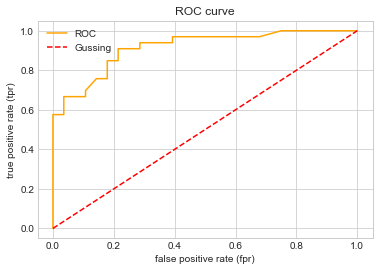

In [14]:
def plot_roc(fpr,tpr) :
    
    """
    plots receiver opertaritng cahracterstics curve (ROC)
    from true positive rate (tpr) and false negative rate (fpr)
   
    """
    fig , ax = plt.subplots()
    
    ax.plot(fpr,tpr,c="orange" , label="ROC")
    ax.plot([0,1],[0,1],c= "red" , label="Gussing", linestyle="--")
    ax.legend()
    ax.set(xlabel="false positive rate (fpr)",
          ylabel = "true positive rate (tpr)",
          title="ROC curve")
    plt.show()

plot_roc(fpr,tpr)

In [15]:
from sklearn.metrics  import roc_auc_score

roc_auc_score(y_test, y_preds_positivs)

0.9145021645021645

In [32]:
y_test

94     1
54     1
261    0
172    0
44     1
      ..
300    0
88     1
9      1
260    0
192    0
Name: target, Length: 61, dtype: int64

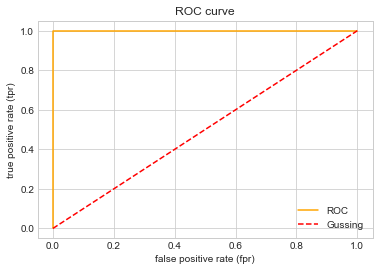

In [16]:
# plot the perfect ROC curve 

fpr, tpr, thresh = roc_curve(y_test, y_test)

plot_roc(fpr,tpr)

In [17]:
# find the perfect AUC score 
roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix
A confusion matrix is a quick 
way to compare the labels a model predicts and the actual labels it was supposed to predict . In essence , giving you an idea of where the model is getting confused 

In [19]:
from sklearn.metrics  import confusion_matrix


y_preds = rfc_model.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[22,  6],
       [ 5, 28]], dtype=int64)

In [21]:
# visualize confusion matrix by using pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Value"],
           colnames =["Predicted Value"])

Predicted Value,0,1
Actual Value,,
0,22,6
1,5,28


In [22]:
22+6+5+28 , len(y_test)

(61, 61)

In [26]:
conda install seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: E:\codes\Machine_learning\mlcourse_codes\numpy\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.11.1             |     pyhd3eb1b0_0         212 KB
    ------------------------------------------------------------
                                           Total:         212 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.1-pyhd3eb1b0_0




seaborn-0.11.1       | 212 KB    |            |   0% 
seaborn-0.11.1       | 212 KB    | 7          |   8% 
seaborn-0.11.1       | 212 KB    | #####2     |  53% 
seaborn-0.11.1       | 212 KB    | ########## | 100% 
seaborn-0.11.1       | 212 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing 

In [27]:
import seaborn  as sns

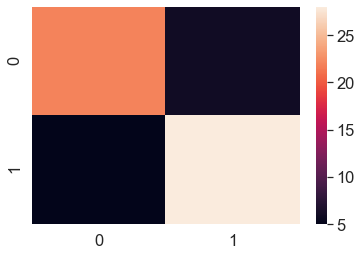

In [32]:
# make confusion matrix more visual using heatmap 

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat);

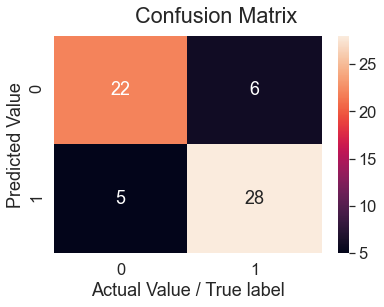

In [45]:
# make a function which will plot confusion matrix 

def plot_conf_mat(conf_mat) :
    """
    Plots confusion matrix using seaborn's heatmap function
    """
    
    fig , ax = plt.subplots()
    
    ax = sns.heatmap(conf_mat,
                     annot=True, # it will annotate the boxes with confusion matrix info ( numbers )
                     #cbar=False   # it will remove the color bar form the side . 
                    )
    ax.set(
        xlabel="Actual Value / True label",
          ylabel="Predicted Value")
    fig.suptitle("Confusion Matrix");


plot_conf_mat(conf_mat)

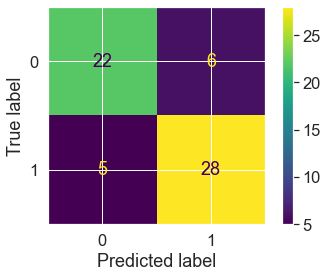

In [44]:
from sklearn.metrics  import plot_confusion_matrix

plot_confusion_matrix(rfc_model,X_test,y_test);

**Classification Report**

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [52]:
# where precision and recall become valuable 
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case 

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds,output_dict=True))

E:\codes\Machine_learning\mlcourse_codes\numpy\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\codes\Machine_learning\mlcourse_codes\numpy\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\codes\Machine_learning\mlcourse_codes\numpy\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


to summarize classification metrics :
* **Accuracy** is a good measure to start with if all classes are balancced (e.g. same amount of samples which are labelled with 0 or 1 )
* **Precision** and **Recall** become more important when classes are imbalanced. 
* If false positive predictions are worse than false negatives , aim for higher precision.
* If false negative predictions are worse than false  positives , aim for higher recall. 
* F1-score is a combination of precision and reall . 

## Regression model evaluation metrics 

most commonly used evaluation metrics for the regression problem are : 
* R^2 (pronounced as R squared ) or coefficient of determination. 
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)

### R^2 

What R-squared does : Compares your models predictions to the mean of the target . If all that the model does is predict the mean of the target , it's r-squrad value will be 0 and if model can predict prefectly the range of number of the target ,  the r-squred value will be 1 . The value can range from negative infinity to 1 . 


In [20]:
from sklearn.ensemble import RandomForestRegressor

X = boston_df.drop("target",axis = 1)

y = boston_df["target"]

y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

# setting randorm seed 

np.random.seed(33)

# splitting into train and test data 
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2)

# instanciating RandomForestRegressor

rfr_model = RandomForestRegressor()

# fitting or training the model 

rfr_model.fit(X_train, y_train)

# scoring model ( r^2 score by default )

rfr_model.score(X_test, y_test)

0.8182255851731138

In [22]:
from sklearn.metrics  import r2_score
y_preds = rfr_model.predict(X_test)
r2_score(y_test,y_test)

0.8182255851731138

In [29]:
y_test

122    20.5
400     5.6
423    13.4
447    12.6
44     21.2
       ... 
165    25.0
106    19.5
470    19.9
149    15.4
110    21.7
Name: target, Length: 102, dtype: float64

In [8]:
y_mean = np.full(len(y_test),np.mean(y_test))
y_mean[:10] , y_test.mean()

(array([21.33039216, 21.33039216, 21.33039216, 21.33039216, 21.33039216,
        21.33039216, 21.33039216, 21.33039216, 21.33039216, 21.33039216]),
 21.330392156862743)

In [9]:
r2_score(y_test, y_mean) #this will result 0 as the model is predicting only the mean

0.0

In [10]:
r2_score(y_test, y_test) # this will result 1 as the model is predicting same as the actual value

1.0

In [11]:
r2_score(y_test,np.random.rand(len(y_test))) # this will result in negaive as the predicted value is 
#random and nowhere near actual value

-6.058590515978386

### Mean Absolute error (MAE)
MAE is the average of the absolute differences between predictions and actual values . It gives you and idea of how wrong your models predictions are 

In [13]:
from sklearn.metrics import mean_absolute_error

y_preds = rfr_model.predict(X_test)

mean_absolute_error(y_test,y_preds)
    


2.2459215686274523

In [14]:
df= pd.DataFrame({"y_test":y_test,
                 "y_preds":y_preds})
df.head()



,y_test,y_preds
122,20.5,18.618
400,5.6,8.658
423,13.4,13.150
447,12.6,15.613
44,21.2,21.874


In [19]:
df["absolute difference/error"] =np.abs(df["y_test"]- df["y_preds"])

In [20]:
df.head()

,y_test,y_preds,absolute difference/error
122,20.5,18.618,1.882
400,5.6,8.658,3.058
423,13.4,13.150,0.250
447,12.6,15.613,3.013
44,21.2,21.874,0.674


In [22]:
np.mean(df["absolute difference/error"]) 

2.2459215686274523

In [30]:
mean_absolute_error(y_test,y_preds) == np.mean(df["absolute difference/error"])

True

## Mean Squared Error (MAE)

In [24]:
df["difference squared"]=np.square(df["y_test"]- df["y_preds"])

In [25]:
df.head()

,y_test,y_preds,absolute difference/error,difference squared
122,20.5,18.618,1.882,3.541924
400,5.6,8.658,3.058,9.351364
423,13.4,13.150,0.250,0.062500
447,12.6,15.613,3.013,9.078169
44,21.2,21.874,0.674,0.454276


In [28]:
from sklearn.metrics  import mean_squared_error

y_preds = rfr_model.predict(X_test) 

mean_squared_error(y_test,y_preds)

13.021313588235294

In [29]:
np.mean(df["difference squared"])

13.021313588235294

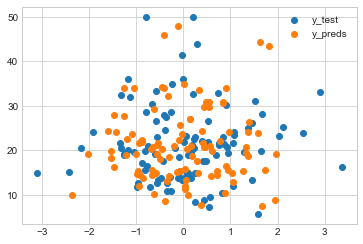

In [42]:
fig , ax = plt.subplots()

ax.scatter(np.random.randn(len(y_test)) , y_test,label = "y_test")
ax.scatter(np.random.randn(len(y_preds)),y_preds,label = "y_preds")
ax.legend();

## 4.2.3 Finally using the `scoring` parameter 

In [45]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
X = heart_disease.drop("target", axis =1 )

y= heart_disease["target"]


**Accuracy**

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

rfc_model = RandomForestClassifier()

cross_val_score(rfc_model, X,y , cv=5 , scoring = None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [56]:
np.random.seed(42)
cross_val_score(rfc_model, X , y , cv = 5 )

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [55]:
np.random.seed(42)
cross_val_score(rfc_model, X , y , cv = 5 , scoring = "accuracy")

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

as we can see , because the default scoring metrics of classification estimators is mean accuracy , if it is not defined , 
cross_val_score will set it to None , and , if None , the default evaluation metric will be set which is in this case mean accuracy 

**Precision**

In [57]:
np.random.seed(42)
cross_val_score(rfc_model, X , y , cv = 5 , scoring = "precision")

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

**Recall**

In [58]:
np.random.seed(42)
cross_val_score(rfc_model, X , y , cv = 5 , scoring = "recall")

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

**F1-score**

In [59]:
np.random.seed(42)
cross_val_score(rfc_model, X , y , cv = 5 , scoring = "f1")

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

now let's try this for the regression problems as well 

In [65]:
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score



rfr_model = RandomForestRegressor()

**R^2** 

In [68]:
np.random.seed(42)
cross_val_score(rfr_model, X , y , cv = 5 , scoring =None)

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [69]:
np.random.seed(42)
cross_val_score(rfr_model, X , y , cv = 5 )

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [70]:
np.random.seed(42)
cross_val_score(rfr_model, X , y , cv = 5 , scoring ="r2")

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

**MAE**

In [71]:
np.random.seed(42)
cross_val_score(rfr_model, X , y , cv = 5 , scoring ="neg_mean_absolute_error")

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

**MSE**

In [73]:
np.random.seed(42)
cross_val_score(rfr_model, X , y , cv = 5 , scoring ="neg_mean_squared_error")

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

## 4.2 Evaluating a model with sklearn functions
### Classification Evaluation Metrics 

In [4]:
from sklearn.metrics import accuracy_score , precision_score ,recall_score ,f1_score
from sklearn.ensemble  import RandomForestClassifier

%matplotlib inline 
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd 

plt.style.use("seaborn-whitegrid")

heart_disease = pd.read_csv("heart-disease.csv")

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size = 0.2)

rfc_model = RandomForestClassifier()

rfc_model.fit(X_train, y_train)

y_preds = rfc_model.predict(X_test)


print("Our Classification Estimator's performance on various Evaluaton Metrics :")

print(f"  The accuracy score of our model evaluated on sklearn accuracy function  : {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"  The precision score of our model evaluated on sklearn accuracy function : {precision_score(y_test,y_preds)*100:.2f}%")
print(f"  The recall score of our model evaluated on sklearn accuracy function    : {recall_score(y_test,y_preds)*100:.2f}%")
print(f"  The f1  score of our model evaluated on sklearn accuracy function       : {f1_score(y_test,y_preds)*100:.2f}%")




Our Classification Estimator's performance on various Evaluaton Metrics :
  The accuracy score of our model evaluated on sklearn accuracy function  : 85.25%
  The precision score of our model evaluated on sklearn accuracy function : 84.85%
  The recall score of our model evaluated on sklearn accuracy function    : 87.50%
  The f1  score of our model evaluated on sklearn accuracy function       : 86.15%


### Regression Evaluation Metrics

In [5]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble  import RandomForestRegressor

%matplotlib inline 
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd 

plt.style.use("seaborn-whitegrid")

from sklearn.datasets import load_boston
boston = load_boston()



boston_df = pd.DataFrame(boston["data"],columns= boston["feature_names"])
boston_df["target"] = boston["target"]


np.random.seed(42)

X = boston_df.drop("target" , axis =1)

y = boston_df["target"]

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

rfr_model = RandomForestRegressor()

rfr_model.fit(X_train, y_train)

y_preds = rfr_model.predict(X_test)



print("Our Regression Estimator's performance on various Evaluaton Metrics :")

print(f"  The r-squared score of our model evaluated on sklearn accuracy function                 : {r2_score(y_test,y_preds)*100:.2f}%")
print(f"  The mean absolute error (MAE) score of our model evaluated on sklearn accuracy function : {mean_absolute_error(y_test,y_preds):.3f}")
print(f"  The mean squared error (MSE) score of our model evaluated on sklearn accuracy function  : {mean_squared_error(y_test,y_preds):.3f}")






Our Regression Estimator's performance on various Evaluaton Metrics :
  The r-squared score of our model evaluated on sklearn accuracy function                 : 86.54%
  The mean absolute error (MAE) score of our model evaluated on sklearn accuracy function : 2.136
  The mean squared error (MSE) score of our model evaluated on sklearn accuracy function  : 9.867


## 5. Improving a model 

first predictions = baseline predictions. 
first model = baseline model

From a data prespective : 
* Could we collect more data ? ( generally , the more data, the better)
* Could we improve our data ? ( feature engineering { adding or removing features } )

From a model prespective : 
* Is there a bettwe model we could use ? 
* Could we improve the current model ? ( tuning the hyperparameters )

Hyperpareameters vs. Parameters 
* Parameters = model find these patterns in data 
* Hyperparameters = settings on a modle you can adjust to (potentially) improbe its ability to find patterns

Three way to adjust hyperparameters: 

1. By hand 
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV




In [6]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()

rfc_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand 

In [5]:
rfc_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we are going to try and adjust :

1. `max_depth`
2. `max_features`
3. `min_samples_leaf`
4. `min_sample_split`
5. `n_estimators`


In [12]:
 def evaluate_preds(y_true, y_preds) :
        """
        Performs various classification evaluation test on true 
        label and prediction label 
        """
        
        accuracy = accuracy_score(y_true, y_preds)
        precision = precision_score(y_true, y_preds)
        recall = recall_score(y_true, y_preds)
        f1= f1_score(y_true, y_preds)
        
        evaluate_dict = {
            "Accuracy" :round(accuracy,2),
            "Precision" : round(precision,2),
            "Recall" : round(recall,2),
            "f1 score" : round(f1,2)
        }
        
        print(f"The accuracy score is : {accuracy*100:.2f}%")
        print(f"The precision score is : {precision:.2f}")
        print(f"The recall score is : {recall:.2f}")
        print(f"The f1  score is : {f1:.2f}")
        
        return evaluate_dict


In [15]:
 heart_disease_shuffled[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0


as train_test_split only divides the data into training and test set , we need to devide the dataset into train validation and test set manually

In [37]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,precision_score , recall_score, f1_score

# setup random seed 

np.random.seed(12)


#shuffle the data 

heart_disease_shuffled = heart_disease.sample(frac =1)

# split the shuffled data into features and label i.e X and y

X = heart_disease_shuffled.drop("target" , axis = 1)
y = heart_disease_shuffled["target"]


# split the data into train , test and validation set 

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split +0.15 *len(heart_disease_shuffled))

X_train , y_train = X[:train_split] , y[:train_split]

X_valid , y_valid = X[train_split:valid_split] , y[train_split:valid_split]

X_test , y_test = X[valid_split:] , y [valid_split:]


print(f"Training set has : {len(X_train)} item")
print(f"Validation set has : {len(X_valid)} item")
print(f"Test set has : {len(X_test)} item")

rfc_model = RandomForestClassifier()

rfc_model.fit(X_train, y_train)

# make baseline prediction

y_preds = rfc_model.predict(X_valid)


baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Training set has : 212 item
Validation set has : 45 item
Test set has : 46 item
The accuracy score is : 75.56%
The precision score is : 0.76
The recall score is : 0.79
The f1  score is : 0.78


{'Accuracy': 0.76, 'Precision': 0.76, 'Recall': 0.79, 'f1 score': 0.78}

## changing the hyperparameter by hand 

In [39]:
# create a model with custom hyperparameter (max_depth)

np.random.seed(12)

rfc_model_1 = RandomForestClassifier(max_depth = 10)

rfc_model.fit(X_train, y_train)

y_preds = rfc_model.predict(X_valid)

byhand_metric = evaluate_preds(y_valid, y_preds)

The accuracy score is : 84.44%
The precision score is : 0.81
The recall score is : 0.92
The f1  score is : 0.86


## 5.2 Hyperparameter tuning using RandomizedSearchCV

In [40]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[1,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "max_features":["auto","sqrt"],
       "min_samples_split": [2,4,6],
       "min_samples_leaf":[1,2,4]}

np.random.seed(12)

# split data into X and y 

X = heart_disease_shuffled.drop("target",axis = 1)
y = heart_disease_shuffled["target"]

# split data into training set and test set 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)

# instanciate classifier 

rfc_classifier = RandomForestClassifier(n_jobs = 1) # n_jobs defines number of processors to assign to the model 

# Setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator = rfc_classifier,
                           param_distributions=grid,
                           n_iter = 10, #number of models to try
                           cv=5,
                           verbose=2 # lines of messages to display 
                           )


# fit the randomized search cv verison classifier to the data

rs_clf.fit(X_train, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [1, 100, 200, 500, 1000,
                                                         1200]},
                   verbose=2)

In [36]:
(6*5*2*3*3)*5

2700

In [21]:
# find out the best hyperparameter parameter 
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20}

In [42]:
# make prediction whit best found hyperparameter attribute values

np.random.seed(12)
y_preds_rs = rs_clf.predict(X_test)


rs_metric = evaluate_preds(y_test, y_preds_rs)


The accuracy score is : 81.97%
The precision score is : 0.81
The recall score is : 0.88
The f1  score is : 0.85


## 5.2 Hyperparameter tuning with GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV


grid_1 = {"n_estimators":[1200,1500,2000],
       "max_depth":[None,20],
       "max_features":["auto"],
       "min_samples_split": [4,6],
       "min_samples_leaf":[4]}

np.random.seed(12)

X = heart_disease_shuffled.drop("target", axis =1)
y = heart_disease_shuffled["target"]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)

rfc_classifier = RandomForestClassifier(n_jobs = 2)

gs_clf = GridSearchCV(estimator = rfc_classifier,
                      param_grid = grid_1 ,
                      cv = 5,
                      verbose = 2
                     )

gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   4.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   2.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   2.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   2.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   3.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1500; total time=   5.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1500; total time=   3.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_sp

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=2),
             param_grid={'max_depth': [None, 20], 'max_features': ['auto'],
                         'min_samples_leaf': [4], 'min_samples_split': [4, 6],
                         'n_estimators': [1200, 1500, 2000]},
             verbose=2)

In [33]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 1500}

In [44]:
y_preds_gs = gs_clf.predict(X_test)

gs_metric = evaluate_preds(y_test,y_preds_gs)

The accuracy score is : 83.61%
The precision score is : 0.82
The recall score is : 0.91
The f1  score is : 0.86


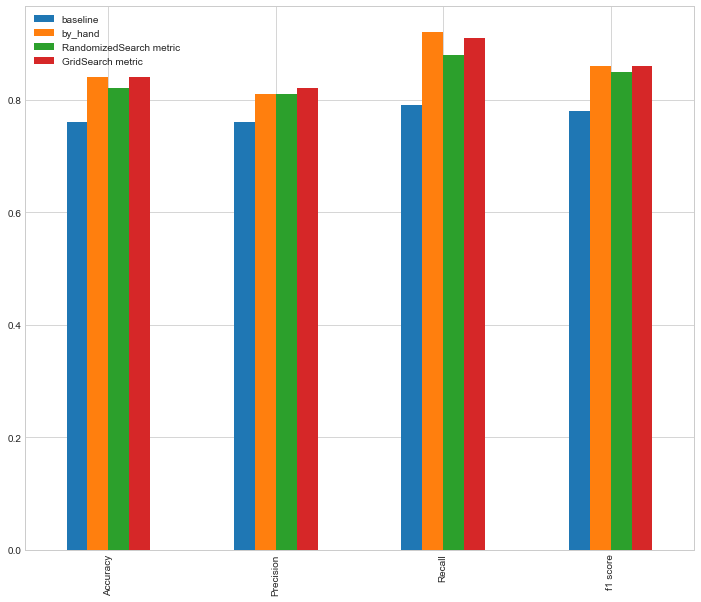

In [47]:
comparison_metrics = pd.DataFrame({
    "baseline": baseline_metrics,
    "by_hand": byhand_metric,
    "RandomizedSearch metric" : rs_metric,
    "GridSearch metric" : gs_metric
})

comparison_metrics.plot.bar(figsize=(12,10));

## Saving an existin model 
we can save an modle using two ways : 
1. Pyhon's `pickle` module
2. `joblib` module 

## pickle

In [ ]:
import pickle

#save an model to a file 

pickle.dump(gs_clf,open("random_forest_classification_model_1.pkl","wb"))


In [52]:
# load ,  and predict from a saved model 

#load 

loaded_pickled_model = pickle.load(open("random_forest_classification_model_1.pkl","rb"))

pickled_modle_y_preds = loaded_pickled_model.predict(X_test)

evaluate_preds(y_test, pickled_modle_y_preds)


The accuracy score is : 83.61%
The precision score is : 0.82
The recall score is : 0.91
The f1  score is : 0.86


{'Accuracy': 0.84, 'Precision': 0.82, 'Recall': 0.91, 'f1 score': 0.86}

In [53]:
gs_metric

{'Accuracy': 0.84, 'Precision': 0.82, 'Recall': 0.91, 'f1 score': 0.86}

## joblib

In [55]:
from joblib import dump , load
    
# save a model to file 

dump(gs_clf, filename="random_forest_classification_model_2.joblib")

['random_forest_classification_model_2.joblib']

In [57]:
# load a model form joblib file 
loaded_joblib_modle = load(filename="random_forest_classification_model_2.joblib")

#make prediction
joblibed_y_preds = loaded_joblib_modle.predict(X_test)

#evaluate evaluation metrics

evaluate_preds(y_test,joblibed_y_preds)

The accuracy score is : 83.61%
The precision score is : 0.82
The recall score is : 0.91
The f1  score is : 0.86


{'Accuracy': 0.84, 'Precision': 0.82, 'Recall': 0.91, 'f1 score': 0.86}

In [58]:
gs_metric

{'Accuracy': 0.84, 'Precision': 0.82, 'Recall': 0.91, 'f1 score': 0.86}

# Putting it all together 

**Pipeline**

documentation is [here](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

Doing all of it in one cell using pipeline 

In [30]:
# libraries to get data ready 

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# libraries to modeling

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , GridSearchCV


# setup random seed 

import numpy as np
np.random.seed(22)

# load data 

data = pd.read_csv("car-sales-extended-missing-data.csv")

# delete data with no labels

data.dropna(subset=["Price"] , inplace = True)


# setup features and make pipeline to transform them 

cat_features = ["Make", "Colour"]
cat_transformer = Pipeline(steps=[
    ("imputer" , SimpleImputer(strategy = "constant" , fill_value = "Missing")),
    ("one_hot" , OneHotEncoder(handle_unknown = "ignore"))
])


door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer" , SimpleImputer(strategy = "constant", fill_value = 4))
])


num_feature = ["Odometer (KM)"]
num_transformer = Pipeline(steps=[
    ("imputer" , SimpleImputer(strategy = "mean"))
])


# setup a preprocessor 

preprocessor = ColumnTransformer(transformers= [
    ("cat", cat_transformer , cat_features),
    ("door" , door_transformer, door_feature),
    ("num" , num_transformer, num_feature)
])


# set up a pipeline for preprocessor and model 

model = Pipeline(steps =[
    ("preprocessor" , preprocessor),
    ("model" , RandomForestRegressor())
])



#split the data into features and labels 

X = data.drop("Price" , axis = 1)
y = data["Price"]

# split the data into training and test set 

X_train, X_test , y_train , y_test = train_test_split(X,y, test_size= 0.2)

# fit the model 

model.fit(X_train, y_train)  # according to the pipeline documentatoin , the final estimator only needs to implement fit 

# evaluate the model with no hyperparameter tuning( defaulf values to hyperparameter )

general_score = model.score(X_test, y_test)


# setup pipegrid for GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], 
    "model__n_estimators" : [100, 1000],
    "model__max_depth":[None,5],
    "model__max_features" :["auto"],
    "model__min_samples_split" : [2,4]
}

# instanciate GridSearchCV

gs_model = GridSearchCV(model, pipe_grid, cv = 5 , verbose =False)

# train GridSearchCV model

gs_model.fit(X_train, y_train)

# evaluate GridSearchCV model with best found hyperparameter attribute value combination from the pipe_grid

gs_score = gs_model.score(X_test, y_test)

# show and compare two 

print(f"The general score is   {general_score} and gs score is {gs_score}")


The general score is   0.2337649717005309 and gs score is 0.30354781049489377
